# Table of Contents
* [Using a lattice](#Using-a-lattice)
	* [Generating some random extensive variable for the threshold (`pop`) and for the attributes (`income_pp`)](#Generating-some-random-extensive-variable-for-the-threshold-%28pop%29-and-for-the-attributes-%28income_pp%29)
	* [Queen matrix](#Queen-matrix)
	* [Rook matrix](#Rook-matrix)
* [Default Max-P](#Default-Max-P)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [Basic Tabu Local Search](#Basic-Tabu-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [AZP Local Search](#AZP-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [AZP Tabu Local Search](#AZP-Tabu-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [Reactive Tabu Local Search](#Reactive-Tabu-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [AZP Simulated Annealing Local Search](#AZP-Simulated-Annealing-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)


In [1]:
%matplotlib inline

import geopandas as gpd
import numpy as np
from pysal.viz.splot.libpysal import plot_spatial_weights
from libpysal.weights import Queen, Rook
from region.max_p_regions.heuristics import MaxPRegionsHeu
from region.p_regions.azp import *

# Using a lattice

In [2]:
gdf = gpd.read_file('reg_lat_10_10.shp')

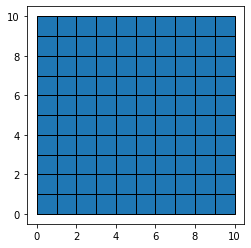

In [3]:
gdf.plot(edgecolor = 'black')

## Generating some random extensive variable for the threshold (`pop`) and for the attributes (`income_pp`)

In [4]:
np.random.seed(123)
gdf['pop'] = np.random.randint(500, high=1000, size=100)

In [5]:
np.random.seed(123)
gdf['income_pp'] = np.random.uniform(low=50000, high=100000, size=100)

In [6]:
w_queen = Queen.from_dataframe(gdf)
w_rook = Rook.from_dataframe(gdf)

## Queen matrix

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x204ad2ef4a8>)

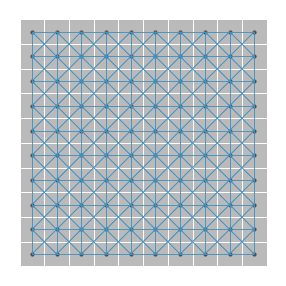

In [7]:
plot_spatial_weights(w_queen, gdf, figsize = (5, 5))

## Rook matrix

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x204ad3f25f8>)

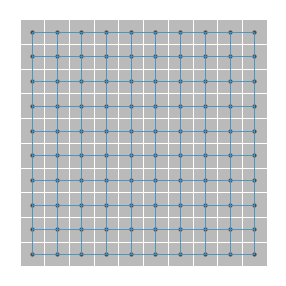

In [8]:
plot_spatial_weights(w_rook, gdf, figsize = (5, 5))

In [9]:
values_gdf = gdf[['income_pp']]
spatially_extensive_attr_gdf = gdf[['pop']].values

# Default Max-P

## Queen

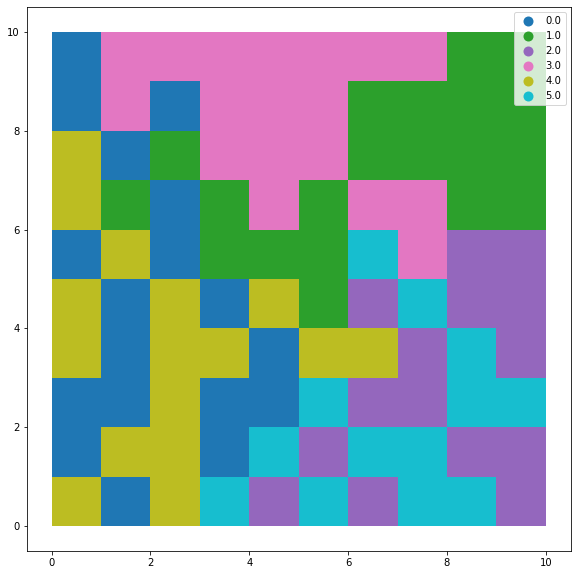

In [10]:
model = MaxPRegionsHeu()
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [11]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    13170
1.0    15777
2.0    11511
3.0    12908
4.0    11782
5.0    10228
Name: pop, dtype: int32

## Rook

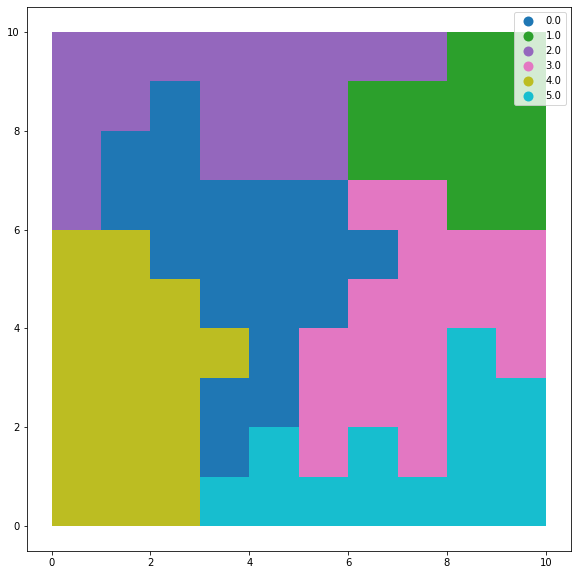

In [12]:
model = MaxPRegionsHeu()
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [13]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    14931
1.0    10200
2.0    12602
3.0    14191
4.0    13123
5.0    10329
Name: pop, dtype: int32

# Basic Tabu Local Search

## Queen

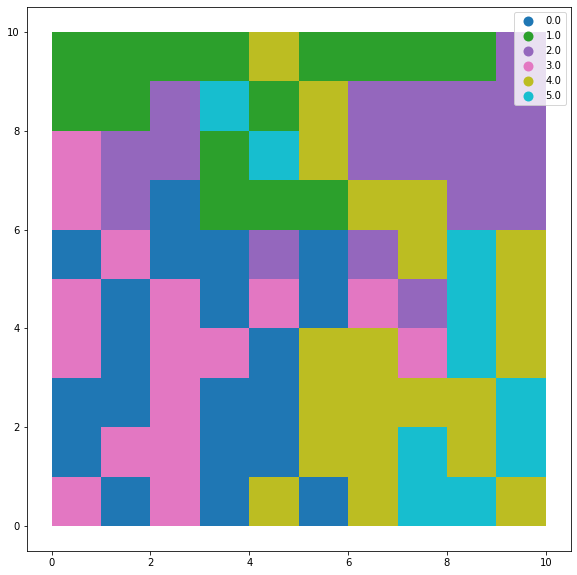

In [14]:
model = MaxPRegionsHeu(local_search = AZPBasicTabu())
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [15]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    14814
1.0    10690
2.0    14279
3.0    12064
4.0    15613
5.0     7916
Name: pop, dtype: int32

## Rook

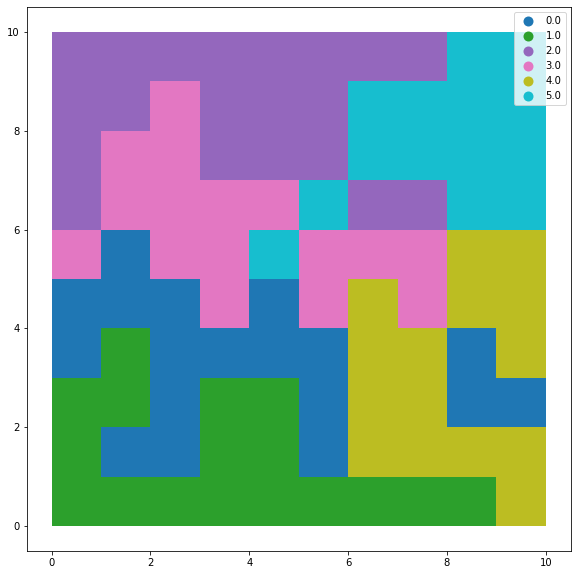

In [16]:
model = MaxPRegionsHeu(local_search = AZPBasicTabu())
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [17]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    13634
1.0    12791
2.0    13877
3.0    11381
4.0    11977
5.0    11716
Name: pop, dtype: int32

# AZP Local Search

## Queen

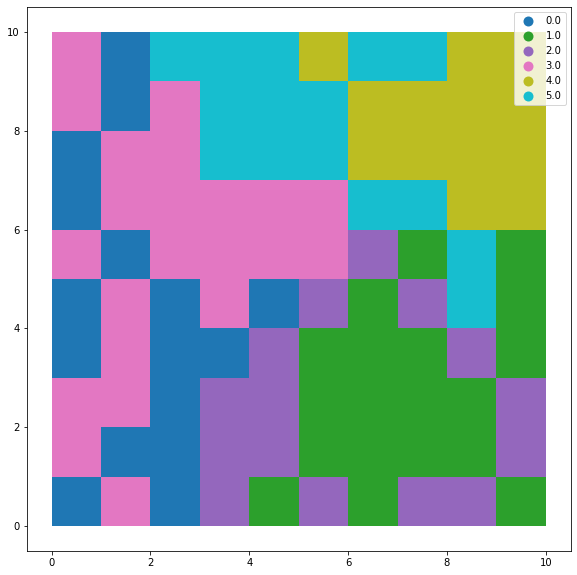

In [18]:
model = MaxPRegionsHeu(local_search = AZP())
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [19]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    11640
1.0    14929
2.0    11694
3.0    15224
4.0    11025
5.0    10864
Name: pop, dtype: int32

## Rook

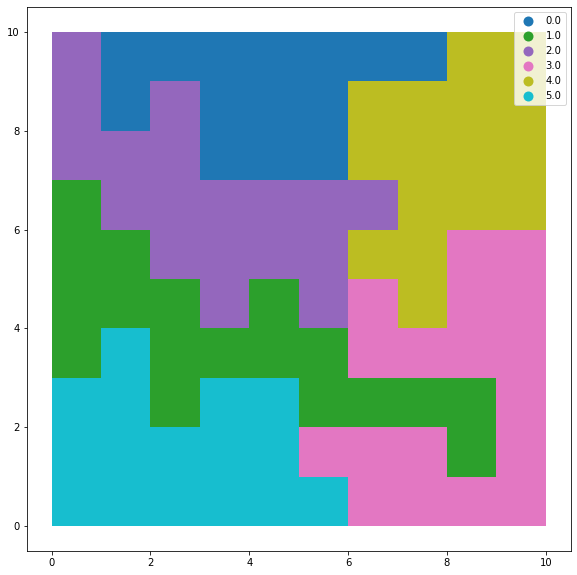

In [20]:
model = MaxPRegionsHeu(local_search = AZP())
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [21]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    10273
1.0    13655
2.0    12568
3.0    14141
4.0    12886
5.0    11853
Name: pop, dtype: int32

# AZP Tabu Local Search

## Queen

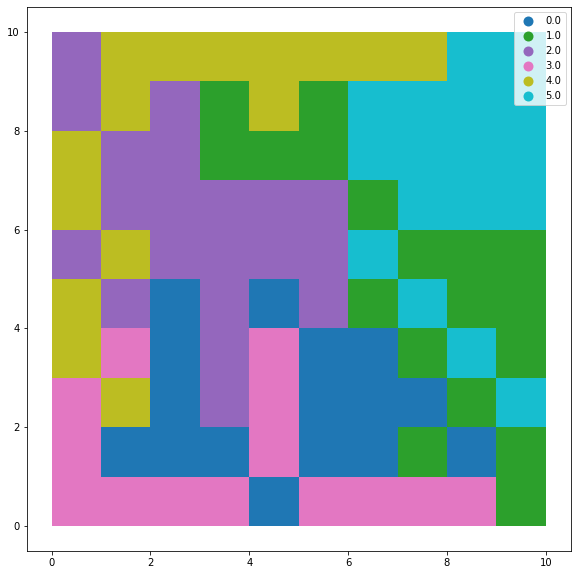

In [22]:
model = MaxPRegionsHeu(local_search = AZPTabu())
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [23]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    13031
1.0    13408
2.0    14076
3.0    10227
4.0    10816
5.0    13818
Name: pop, dtype: int32

## Rook

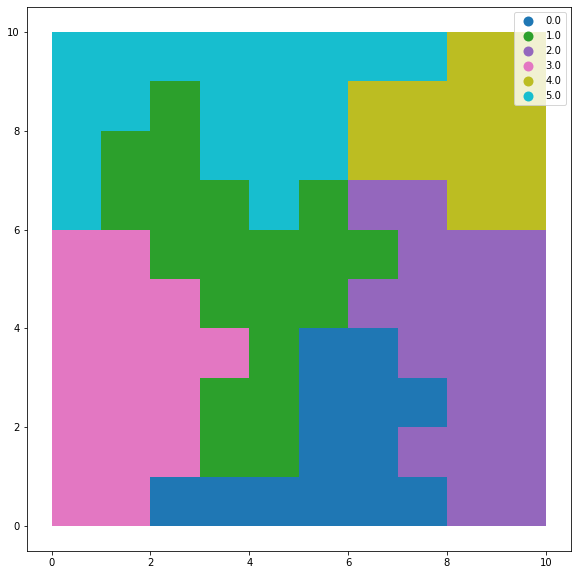

In [24]:
model = MaxPRegionsHeu(local_search = AZPTabu())
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [25]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    10245
1.0    14886
2.0    14364
3.0    12399
4.0    10200
5.0    13282
Name: pop, dtype: int32

# Reactive Tabu Local Search

## Queen

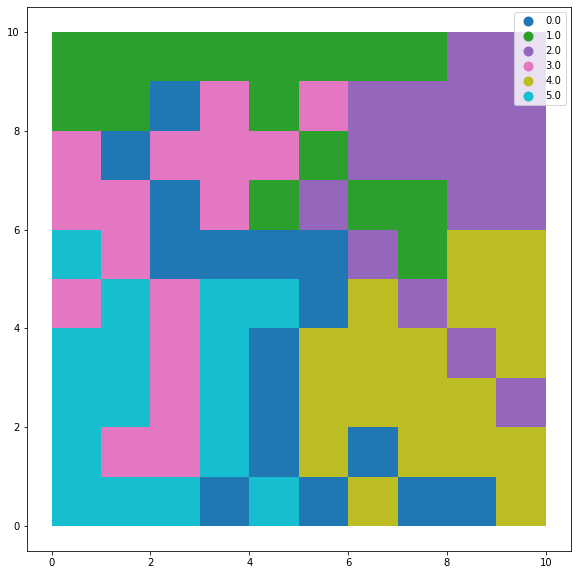

In [26]:
model = MaxPRegionsHeu(local_search = AZPReactiveTabu(max_iterations = 2, k1 = 2, k2 = 2))
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [27]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    11946
1.0    11542
2.0    13916
3.0    10791
4.0    15031
5.0    12150
Name: pop, dtype: int32

## Rook

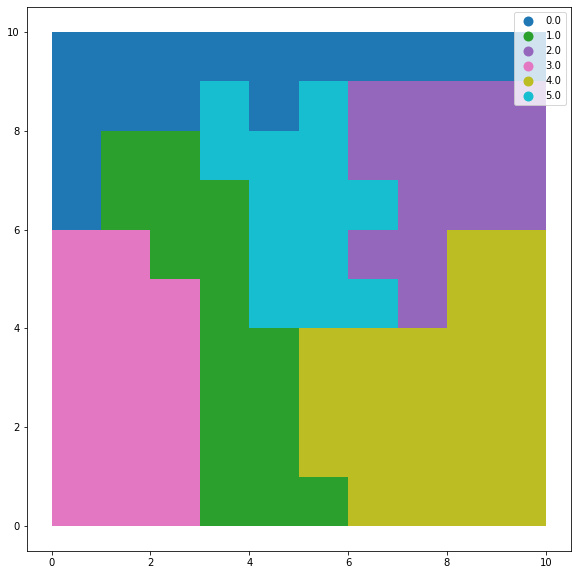

In [28]:
model = MaxPRegionsHeu(local_search = AZPReactiveTabu(max_iterations = 2, k1 = 2, k2 = 2))
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [29]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    11225
1.0    12048
2.0    11489
3.0    12621
4.0    18279
5.0     9714
Name: pop, dtype: int32

# AZP Simulated Annealing Local Search

## Queen

In [ ]:
model = MaxPRegionsHeu(local_search = AZPSimulatedAnnealing(init_temperature=1))
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [ ]:
gdf.groupby(['labels'])['pop'].sum()

## Rook

In [ ]:
model = MaxPRegionsHeu(local_search = AZPSimulatedAnnealing(init_temperature=1))
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [ ]:
gdf.groupby(['labels'])['pop'].sum()